In [1]:
import pandas as pd
import json

In [120]:
import requests

api_url = "https://textbook-summary-api-zoghmeioka-ue.a.run.app/score"


def get_results(summary, section):
    result = requests.post(
        api_url,
        json={
            "chapter_index": 1,
            "section_index": section,
            "summary": summary,
        },
    )
    return result.json()


In [121]:
df = pd.read_csv('../data/PCA_scores_itell.csv')

In [122]:
df = df[['id', 'section', 'summary', 'Content_pca',
       'Wording_pca']]

In [124]:
df

,id,section,summary,Content_pca,Wording_pca
0,55895b93fdf99b6bd06017c4,3,"in this section, students will acquire the abi...",2.651988,-0.072425
1,55895b93fdf99b6bd06017c42,2,"upon completion of this section, you will have...",4.925285,3.082666
2,57a9f41a16a091000112f1cf,3,individuals learn how to think critically and ...,3.467739,1.300965
3,57a9f41a16a091000112f1cf2,2,economics is a subject that concerns the well-...,3.641325,-0.759120
4,589fc07f1521230001ebf494,4,the heritage foundation categorizes types of e...,0.007936,0.614270
...,...,...,...,...,...
118,63dae36f736faa53f7c681272,2,microeconomics involve the smaller stakeholder...,1.422384,1.300965
119,63e524df61b5e74ad715852b,3,economic theory differs from psychological or ...,-5.180453,-0.072425
120,63e524df61b5e74ad715852b,4,markets in general have evolved from a one fac...,0.378691,1.848468
121,63e563e181e6c9cc44348a12,4,this section was a learning experience. i was ...,0.606633,0.614270


In [123]:
get_results(df.iloc[0]['summary'], int(df.iloc[0]['section']))

{'content': 1.0255756378173828,
 'wording': 0.5694109797477722,
 'containment': 0.1977,
 'similarity': 0.8507235646247864}

In [ ]:
output_dict = {'id': [], 'section':[], 'content':[], 'wording':[], 'containment':[], 'similarity':[]}
counter = 0
for row in df.iterrows():
    print(counter, end='\r')
    row = row[1]
    output_dict['id'].append(row['id'])
    output_dict['section'].append(row['section'])
    results = get_results(row['summary'], int(row['section']))
    for output in results:
        output_dict[output].append(results[output])
    counter += 1
                                  
                          
    

In [129]:
output_df = pd.DataFrame.from_dict(output_dict)
output_df.sort_values(by='content')

,id,section,content,wording,containment,similarity
108,63bd61cff50297c9332e3f39,4,-0.637625,-1.617876,0.0769,0.450501
50,60bea11ea6e2371d747c5d1d,4,-0.434837,-0.668720,0.0000,0.349588
65,611c60d5deace46324300f932,2,-0.377974,-0.125634,0.0000,0.491621
100,636a3e0221fc09ace967b1222,2,-0.371187,0.483440,0.0000,0.475755
27,5e310b3d6126060fd73219ce,4,-0.335738,-1.383275,0.0286,0.569198
...,...,...,...,...,...,...
109,63be7173226d9b8c566ddd44,3,NaN,NaN,0.7429,0.786787
111,63c3343c5a670ddd37e82f2b,4,NaN,NaN,0.7222,0.685960
112,63c3343c5a670ddd37e82f2b2,2,NaN,NaN,0.8000,0.817029
115,63cc61c7c2ae0809f0c71cb51,1,NaN,NaN,0.7302,0.509925


In [ ]:
output_df.to_csv('../data/qualtrics_model_results.csv')

In [1]:
import pandas as pd
import json
from sklearn.preprocessing import StandardScaler
import numpy as np

In [5]:
df = pd.read_csv('../data/PCA_scores_itell.csv')
df1 = pd.read_csv('../data/qualtrics_model_results.csv', index_col=0)
# df = df[['id', 'section', 'summary', 'Paraphrase', 'Content_pca',
#        'Wording_pca']]

df['content_pca'] = StandardScaler().fit_transform(np.array(df['Content_pca']).reshape(-1,1))
df['wording_pca'] = StandardScaler().fit_transform(np.array(df['Wording_pca']).reshape(-1,1)) 

In [50]:
merged_df = df.merge(df1, on=['id', 'section'])
merged_df

,Unnamed: 0,...1,id,section,summary,Details,Language,main_points,Organization,Voice,Wording,Content_pca,Wording_pca,content_pca,wording_pca,content,wording,containment,similarity
0,1,0,55895b93fdf99b6bd06017c4,3,"in this section, students will acquire the abi...",0.660288,0.425193,0.922787,1.209107,0.432930,-0.337080,2.651988,-0.072425,0.929284,-0.047182,1.025576,0.569411,0.1977,0.855428
1,2,1,55895b93fdf99b6bd06017c42,2,"upon completion of this section, you will have...",1.385426,2.059530,1.679473,1.209107,1.565918,1.606396,4.925285,3.082666,1.725870,2.008227,0.778388,-0.054625,0.0496,0.806786
2,3,2,57a9f41a16a091000112f1cf,3,individuals learn how to think critically and ...,0.660288,0.425193,0.922787,1.209107,1.565918,0.958571,3.467739,1.300965,1.215131,0.847524,1.029888,0.669857,0.1304,0.817984
3,4,3,57a9f41a16a091000112f1cf2,2,economics is a subject that concerns the well-...,2.110564,0.425193,0.922787,0.400845,0.432930,-0.984905,3.641325,-0.759120,1.275958,-0.494535,1.116090,0.919914,0.1702,0.830087
4,5,4,589fc07f1521230001ebf494,4,the heritage foundation categorizes types of e...,-0.064850,0.425193,0.922787,-0.407416,-0.700057,0.310746,0.007936,0.614270,0.002781,0.400171,0.128620,0.617704,0.1395,0.595682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,119,118,63dae36f736faa53f7c681272,2,microeconomics involve the smaller stakeholder...,0.660288,0.425193,0.166102,0.400845,0.432930,0.958571,1.422384,1.300965,0.498418,0.847524,-0.154067,0.671676,0.0000,0.546337
119,120,119,63e524df61b5e74ad715852b,3,economic theory differs from psychological or ...,-2.240264,0.425193,-1.347270,-0.407416,-1.833045,-0.337080,-5.180453,-0.072425,-1.815284,-0.047182,0.514868,0.328127,0.0260,0.703034
120,121,120,63e524df61b5e74ad715852b,4,markets in general have evolved from a one fac...,-0.064850,1.242362,0.166102,1.209107,-0.700057,0.958571,0.378691,1.848468,0.132697,1.204199,0.053625,-1.038731,0.0000,0.534392
121,122,121,63e563e181e6c9cc44348a12,4,this section was a learning experience. i was ...,0.660288,0.425193,0.166102,0.400845,-0.700057,0.310746,0.606633,0.614270,0.212570,0.400171,0.708631,0.269264,0.0198,0.666737


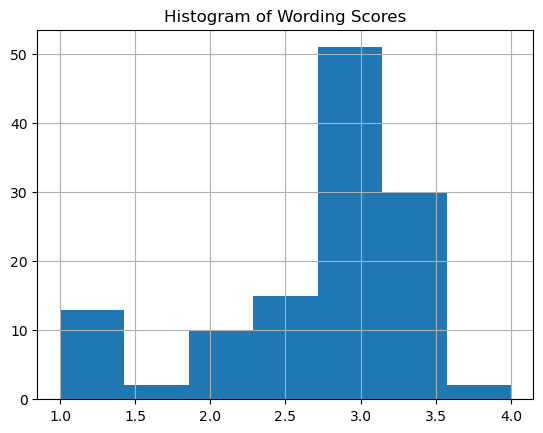

In [48]:
from matplotlib import pyplot as plt

df2 = pd.read_csv('../data/qualtrics_data/qualtrics_ratings_wide.csv')
df3 = df2.merge(df1, on = ['id', 'section'])

# df3[df3['Details'] < 2].similarity.std()

df3['Wording'].hist(bins = 7)
plt.title('Histogram of Wording Scores')
plt.show()

In [23]:
import seaborn as sns
from matplotlib import pyplot as plt

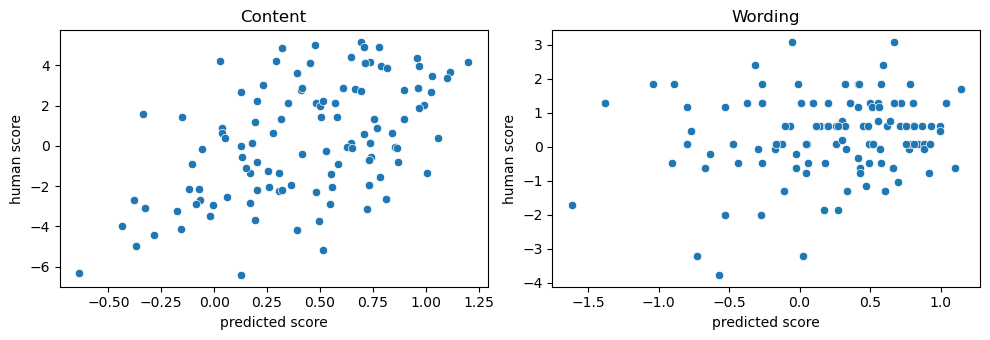

In [99]:
fig, ax =plt.subplots(1,2)
plt.rcParams["figure.figsize"] = [10.00, 3.50]
plt.rcParams["figure.autolayout"] = True
sns.scatterplot(data=merged_df, x='content', y='Content_pca', ax=ax[0])
sns.scatterplot(data=merged_df, x='wording', y='Wording_pca', ax=ax[1])
ax[0].set(xlabel='predicted score', ylabel='human score', title='Content')
ax[1].set(xlabel='predicted score', ylabel='human score', title='Wording')
plt.show()

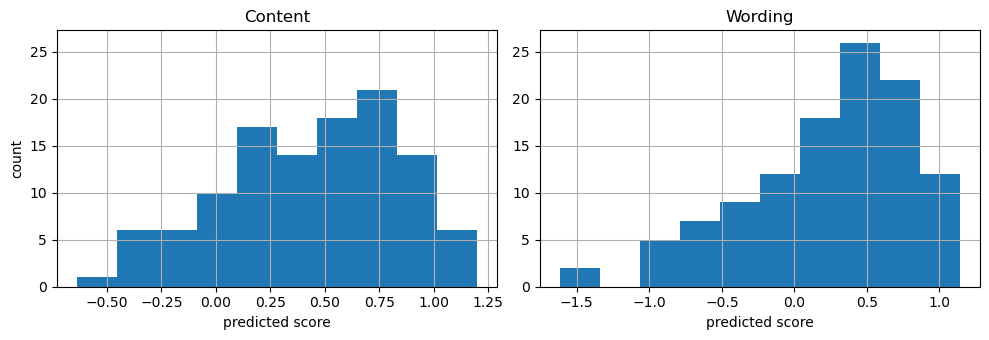

In [114]:

fig=plt.figure()
ax1 = plt.subplot(121)
merged_df['content'].hist()#figsize=(15,5))
ax2 = plt.subplot(122, sharey = ax1)
merged_df['wording'].hist()#figsize=(15,5))


ax1.set(xlabel='predicted score', ylabel='count', title='Content')
ax2.set(xlabel='predicted score', title='Wording')
plt.show()

In [79]:
i = 2
print(merged_df[merged_df['containment'] < .6].sort_values(by='wording').iloc[i].summary)
print('Pred Content:', merged_df[merged_df['containment'] < .6].sort_values(by='content').iloc[i].content)
print('Pred Wording:', merged_df[merged_df['containment'] < .6].sort_values(by='content').iloc[i].wording)
print('Human Content:', merged_df[merged_df['containment'] < .6].sort_values(by='content').iloc[i].Content_pca)
print('Human Wording:', merged_df[merged_df['containment'] < .6].sort_values(by='content').iloc[i].Wording_pca)

markets in general have evolved from a one faceted motivator (heritage, location, government), to "mixed" markets that inherently require contributions from each of the main economies to function.  mixed markets combine the immediate accessibility/availability of products from the traditional market, and use technology and demand sourced from outside the immediate market to allow for larger exposure. by importing and exporting products, a country can grow their markets, and subsequently, their gdp. a countries gdp is the total value of production for the country, including all market contributions. globalization can help increase a countries markets, and subsequently gdp, by allowing merchants to access other markets world wide.
Pred Content: -0.3779744505882263
Pred Wording: -0.1256340146064758
Human Content: -2.6792133744362
Human Wording: 0.0667669402738436


In [118]:
merged_df[['id', 'section', 'summary','Content_pca', 'Wording_pca', 'content', 'wording']].sort_values(by='wording')

,id,section,summary,Content_pca,Wording_pca,content,wording
108,63bd61cff50297c9332e3f39,4,globalization has risen over the period. there...,-6.301714,-1.714934,-0.637625,-1.617876
27,5e310b3d6126060fd73219ce,4,traditional economy is a vintage style economy...,1.585082,1.300965,-0.335738,-1.383275
120,63e524df61b5e74ad715852b,4,markets in general have evolved from a one fac...,0.378691,1.848468,0.053625,-1.038731
80,628fa4639666e8550aa139d5,3,"as john keynes said, economics is not just a s...",-1.102067,-0.480736,0.152709,-0.907212
63,61127edae420c460b6e45aa01,1,economics is not just a set of rules to memori...,2.651988,1.848468,0.126374,-0.893030
...,...,...,...,...,...,...,...
109,63be7173226d9b8c566ddd44,3,economist analyze issues and problems using ec...,-1.384366,-3.775019,NaN,NaN
111,63c3343c5a670ddd37e82f2b,4,the economic life of every individual is inter...,-2.841912,-3.227516,NaN,NaN
112,63c3343c5a670ddd37e82f2b2,2,economics is concerned with the well-being of ...,-1.384366,-3.227516,NaN,NaN
115,63cc61c7c2ae0809f0c71cb51,1,"every society, at every level, must make choic...",-5.703017,-3.775019,NaN,NaN


In [72]:
merged_df.describe()

,section,Content_pca,Wording_pca,content_pca,wording_pca,content,wording,containment,similarity
count,123.000000,1.230000e+02,1.230000e+02,1.230000e+02,1.230000e+02,113.000000,113.000000,123.000000,123.000000
mean,2.487805,-8.520736e-16,-6.882480e-16,3.068909e-17,6.318342e-18,0.435288,0.238828,0.133146,0.659266
std,1.126185,2.865469e+00,1.541297e+00,1.004090e+00,1.004090e+00,0.400307,0.562543,0.219692,0.119759
min,1.000000,-6.410056e+00,-3.775019e+00,-2.246150e+00,-2.459266e+00,-0.637625,-1.617876,0.000000,0.388329
25%,1.500000,-2.157367e+00,-5.503320e-01,-7.559635e-01,-3.585181e-01,0.169356,-0.069949,0.009050,0.561615
50%,2.000000,-1.004060e-01,6.676694e-02,-3.518328e-02,4.349585e-02,0.483696,0.332863,0.035700,0.665729
75%,3.500000,2.232506e+00,1.161773e+00,7.822931e-01,7.568460e-01,0.736508,0.666189,0.124600,0.749937
max,4.000000,5.153227e+00,3.082666e+00,1.805744e+00,2.008227e+00,1.200112,1.141834,0.879500,0.896394


In [73]:
old_df = pd.read_csv('../data/final_summaries_ai_aloe_fixed.csv')

In [74]:
old_df.describe()

,Unnamed: 0.1,Unnamed: 0,Row.names,Main.Point,Details,Cohesion,Objective.Language,Wording.Para,Lang..Bey..ST,Summ..Length,content_pca,paraphrase_pca
count,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000
mean,2344.500000,2345.500000,2345.500000,3.051066,2.789019,2.969403,2.791151,2.225267,2.264392,2.401812,7.999806,3.512840
std,1354.030711,1354.030711,1354.030711,0.802138,0.836492,0.792016,0.729037,0.911674,0.699626,0.919741,2.039584,1.245746
min,0.000000,1.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.760000,0.000000
25%,1172.250000,1173.250000,1173.250000,2.500000,2.000000,2.500000,2.500000,1.500000,2.000000,2.000000,6.740000,2.600000
50%,2344.500000,2345.500000,2345.500000,3.000000,3.000000,3.000000,3.000000,2.500000,2.000000,2.500000,8.220000,3.680000
75%,3516.750000,3517.750000,3517.750000,3.500000,3.500000,3.500000,3.500000,3.000000,3.000000,3.000000,9.590000,4.465000
max,4689.000000,4690.000000,4690.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,10.960000,6.280000
